## Idea
My CPT is a memory match game. The player is shown a certain number of closed cards, and when a player clicks on one of them, it gets revealed. The player can click another card, and if it matches, then the cards will be added to the score, otherwise, the cards flip back and the player will use their memory to get try to match as many as they can. My twist on this game is that some of the cards are junk foods that will deduct points if it gets matched. The purpose is to help the player to get more memory but encouraging them to memorize tiles, as well to help them identify what foods are healthy and which ones are not through the use of a point system, which encourages these behaviours for a larger amount of points. In addition, the scores are kept in a highscore table, which would be kept in a database, and it will further encourage memorization of things since the highscore table will instill a sense of competition with other people.
Outline of the process:
- The player gets taken to the menu screen
- When they press start, they will be faced with the memory puzzle, with randomly generated good and bad things, and they will be tasked with matching everything healthy while a timer goes up according to the time that has passed. However, if they matched a unhealthy food, the time will go up by an extra 5 seconds.
- When all of the healthy food had been matched, the timer is stopped and the program will ask the player the name it would like to be used. 
- The database then sends back the compilation of all highscores that has been sent, with multiple catergories: daily, weekly, monthly, and all time.
- The program would then used the information to create a new highscore table, adding the new score to the table, which is displayed
- The program updates the database with this new table.
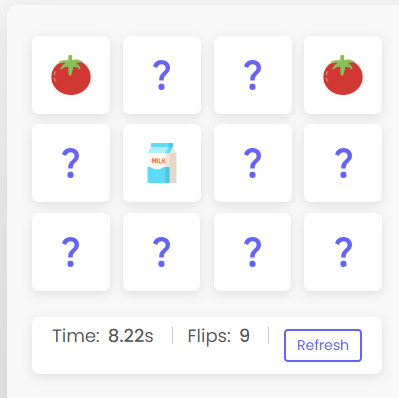

## CRUD
Create - my game will create entries in the scores

Read - my game will read the entire database to create a table

Update - my game will update the player's best scores

Delete - my game will delete the player's score after they terminate their account


## Collegeboard Grading

|Catergory|Score|Comments|
|---------------|-------------|-------------------------------------|
|Purpose|1            |The purpose is to help people identify healthy and unhealthy foods and complement that with challenges to their memory with this memory game.|
|Data Abstraction|1           |The scores is stored within a list to be used instead of creating new variables whenever new data is added.|
|Managing Complexity|1        |The list of all the data passed to backend is shown to be able to be used effectively to reduce the complexity needed for another program to have the same function which would need the creation of many variables|
|Procedural Abstraction|1     |The function flipcard takes a parameter in for of the card that was just flipped and uses that to easily determine what to do from there.|
|Algorithm Implementation|1   |The function endGame demonstrates use of sequence, iteration, and selection, and demonstrates how it is called within the program: after the eEsults button is pressed..|
|Testing        |1            |After excessive testing of every possible combination of cards, there is no behavior that was not expected.|
|Total          |6/6          | |